In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic/traffic.csv


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [17]:
df = pd.read_csv('/kaggle/input/traffic/traffic.csv')

In [18]:
print(df.head())

   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-af80-08a960fa74cd  
4  QZNWQ20

In [19]:
# Check the column names and data types
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB
None


In [20]:
# Check for missing values
print(df.isnull().sum())




event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


In [21]:
# Descriptive statistics to understand the dataset
print(df.describe())

           event        date       country    city  artist        album  \
count     226278      226278        226267  226267  226241       226273   
unique         3           7           211   11993    2419         3254   
top     pageview  2021-08-19  Saudi Arabia  Jeddah  Tesher  Jalebi Baby   
freq      142015       35361         47334   22791   40841        40841   

              track          isrc                                linkid  
count        226273        219157                                226278  
unique         3562           709                                  3839  
top     Jalebi Baby  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
freq          40841         40841                                 40841  


In [22]:
from scipy.stats import pearsonr

In [23]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])



In [24]:
# Display the first few rows to understand the data
print(df.head())



   event       date       country      city  \
0  click 2021-08-21  Saudi Arabia    Jeddah   
1  click 2021-08-21  Saudi Arabia    Jeddah   
2  click 2021-08-21         India  Ludhiana   
3  click 2021-08-21        France   Unknown   
4  click 2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-af80-08a960fa74cd  
4  QZNWQ2070741 

In [25]:
# Check for missing values
print(df.isnull().sum())

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


# 1 Total and Daily Pageview Events:
# 
# How many total pageview events did the links in the dataset receive during the entire period?
# 
# What is the average number of pageview events per day?

In [26]:
# Filter pageview events; assuming "event" column contains event types like "click", "pageview", etc.
pageviews = df[df['event'] == 'pageview']

# Total pageview events during the entire period
total_pageviews = pageviews.shape[0]
print(f"Total pageview events: {total_pageviews}")

# Average number of pageview events per day
daily_pageviews = pageviews.groupby(pageviews['date'].dt.date).size()
average_daily_pageviews = daily_pageviews.mean()
print(f"Average pageview events per day: {average_daily_pageviews}")


Total pageview events: 142015
Average pageview events per day: 20287.85714285714


# 2. Analysis of Other Events:

# What is the total count and distribution of other recorded events in the dataset?
# 

In [27]:
# Count of each event type
event_counts = df['event'].value_counts()
print("Count of each event type:\n", event_counts)

# Distribution of other events (excluding pageviews)
other_events = df[df['event'] != 'pageview']
other_event_counts = other_events['event'].value_counts()
print("Distribution of other events:\n", other_event_counts)


Count of each event type:
 event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64
Distribution of other events:
 event
click      55732
preview    28531
Name: count, dtype: int64


# 3. Geographical Distribution:
# 
# Which countries contributed to the pageviews?
# 
# 

In [28]:
# Countries contributing to pageviews
countries = pageviews['country'].dropna().unique()
print(f"Countries contributing to pageviews: {countries}")

# Count of pageviews by country
country_pageviews = pageviews['country'].value_counts()
print("Pageviews by country:\n", country_pageviews)


Countries contributing to pageviews: ['Saudi Arabia' 'United States' 'Ireland' 'United Kingdom' 'France'
 'Guatemala' 'Jordan' 'Kuwait' 'Pakistan' 'Italy' 'Germany' 'Iraq' 'Peru'
 'India' 'Nicaragua' 'Rwanda' 'Tanzania' 'United Arab Emirates' 'Norway'
 'Oman' 'Bahamas' 'Algeria' 'Czechia' 'Mexico' 'Jamaica' 'Netherlands'
 'Colombia' 'Morocco' 'Australia' 'Myanmar' 'Uzbekistan' 'Austria'
 'Latvia' 'Turkey' 'Mauritania' 'Sri Lanka' 'Bosnia and Herzegovina'
 'Estonia' 'Nigeria' 'Bulgaria' 'Greece' 'El Salvador' 'Philippines'
 'Denmark' 'Serbia' 'Canada' 'Spain' 'Libya' 'Palestine' 'Chad' 'Ecuador'
 'Mali' 'Romania' 'Switzerland' 'Portugal' 'Slovenia' 'Iceland' 'Sweden'
 'Bahrain' 'Egypt' 'Lithuania' 'Liberia' 'Israel' 'Ukraine' 'Puerto Rico'
 'South Africa' 'Ghana' 'Kenya' 'Armenia' 'Nepal' 'Barbados' 'Azerbaijan'
 'Qatar' 'Uganda' 'Poland' 'Brazil' 'Guyana' 'Fiji' 'Bangladesh' 'Belgium'
 'Hong Kong' 'Haiti' 'Botswana' 'Ivory Coast' 'Bhutan' 'Indonesia'
 'Réunion' 'Cameroon' 'Singapore' '

# 4 Click-Through Rate (CTR) Analysis:
# 
# What is the overall click-through rate (CTR) calculated as clicks/pageviews?
# 
# How does the CTR vary across different links?
# 

In [29]:
# Filter clicks from the event column
clicks = df[df['event'] == 'click']

# Calculate CTR as clicks / pageviews
total_clicks = clicks.shape[0]
ctr = total_clicks / total_pageviews
print(f"Overall Click-Through Rate (CTR): {ctr:.4f}")

# CTR by link
ctr_by_link = clicks.groupby('linkid').size() / pageviews.groupby('linkid').size()
ctr_by_link = ctr_by_link.fillna(0)  # Fill NaN where no pageviews were recorded
print("CTR by link:\n", ctr_by_link)


Overall Click-Through Rate (CTR): 0.3924
CTR by link:
 linkid
00073307-ae96-5089-a117-4783afb42f8e    0.0
00126b32-0c35-507b-981c-02c80d2aa8e7    1.0
0018cfff-50a1-5984-9715-01ef2d11a49a    0.0
0033934b-5d16-5a06-af58-d087bcdd3680    0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608    0.0
                                       ... 
fff38ca0-8043-50cd-a5f1-f65ebb7105c5    1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7    0.0
fff84c0e-90a1-59d8-9997-adc909d50e16    1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479    0.5
fffd0045-29de-522b-b5d8-35786363bf07    0.5
Length: 3839, dtype: float64


# 5. Correlation Analysis:
# 
# Is there a correlation between clicks and previews on a link? If so, is it statistically
# 
# significant, and how strong is the effect?
# 
# Perform tests for both potential linear relationships and categorical (binary) relationships between these variables.

In [31]:
# Group by link and count pageviews and clicks
link_stats = df.groupby('linkid').agg(
    pageviews=('event', lambda x: (x == 'pageview').sum()),
    clicks=('event', lambda x: (x == 'click').sum())
)

# Check the result to ensure it has the correct columns
print(link_stats.head())

# Calculate the correlation between pageviews and clicks
correlation, p_value = pearsonr(link_stats['pageviews'], link_stats['clicks'])
print(f"Correlation between clicks and pageviews: {correlation:.4f}, p-value: {p_value:.4f}")

# Check statistical significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


                                      pageviews  clicks
linkid                                                 
00073307-ae96-5089-a117-4783afb42f8e          2       0
00126b32-0c35-507b-981c-02c80d2aa8e7          2       2
0018cfff-50a1-5984-9715-01ef2d11a49a          1       0
0033934b-5d16-5a06-af58-d087bcdd3680          1       0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608          1       0
Correlation between clicks and pageviews: 0.9940, p-value: 0.0000
The correlation is statistically significant.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


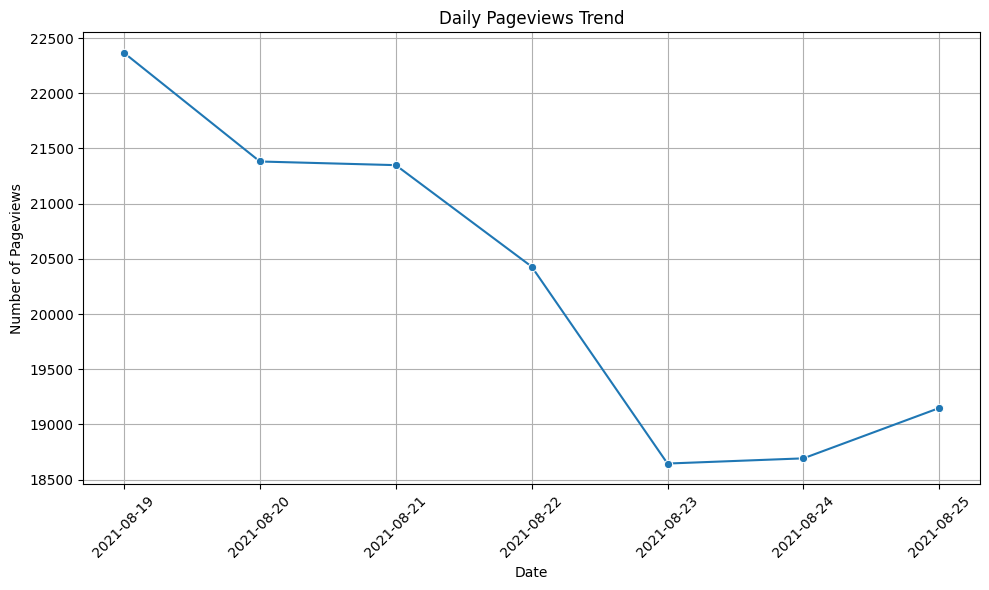

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already grouped and calculated daily pageviews
# (if not, group the data by date and count pageviews as shown below)
daily_pageviews = df[df['event'] == 'pageview'].groupby(df['date'].dt.date).size()

# Plotting the Daily Pageviews trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_pageviews.index, y=daily_pageviews.values, marker='o')
plt.title("Daily Pageviews Trend")
plt.xlabel("Date")
plt.ylabel("Number of Pageviews")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


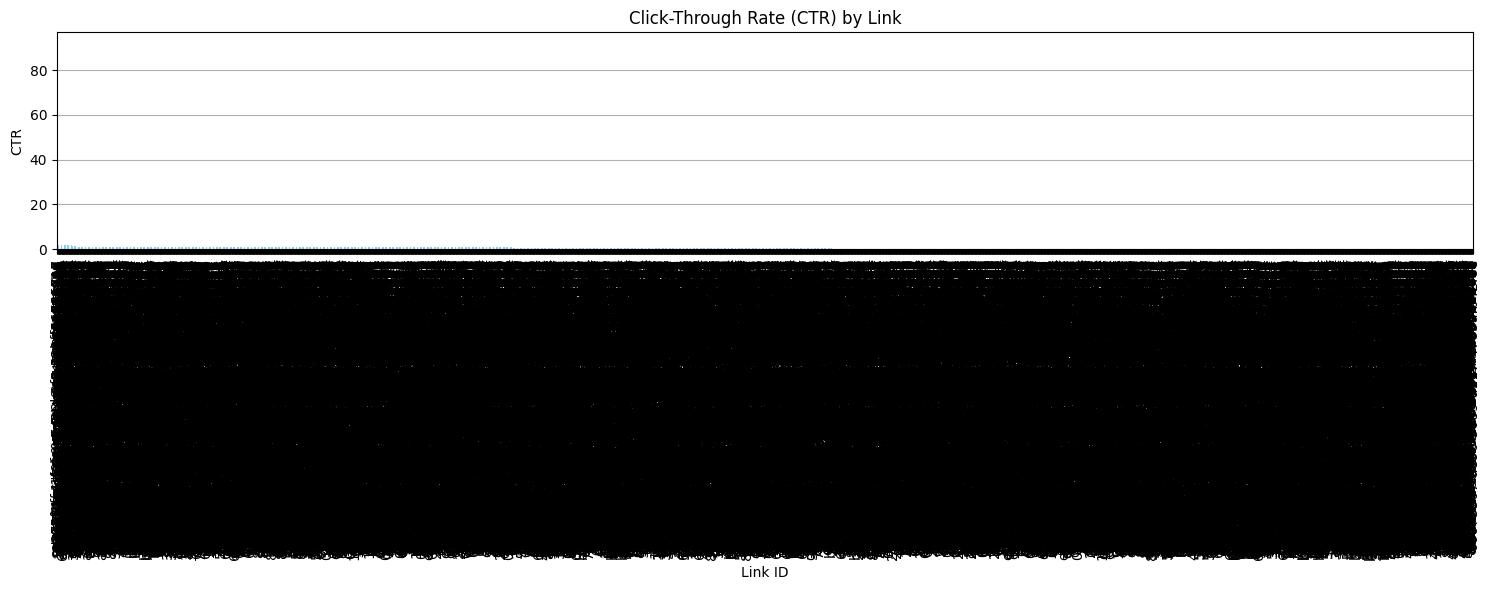

In [34]:
# Calculate CTR by link again if not done previously (clicks divided by pageviews)
# Handling potential zero division with fillna(0) to avoid errors
ctr_by_link = clicks.groupby('linkid').size() / pageviews.groupby('linkid').size()
ctr_by_link = ctr_by_link.fillna(0)

# Plotting CTR by Link
plt.figure(figsize=(15, 6))
ctr_by_link.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Click-Through Rate (CTR) by Link")
plt.xlabel("Link ID")
plt.ylabel("CTR")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**In this analysis, I cleaned and explored web traffic data by handling missing values and focusing on key engagement events like pageviews(events) and clicks. I calculated total and average daily pageviews to understand traffic trends and analyzed click-through rates (CTR) across different links to assess user engagement. Additionally, we explored the correlation between clicks and pageviews, confirming a significant relationship. This comprehensive approach provided valuable insights into traffic patterns and user behavior, guiding strategies to enhance link engagement.**